In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
mvid = pd.read_csv('drive/My Drive/Colab Notebooks/SGD_by_hand/MVID_101001_171001.txt')
sber = pd.read_csv('drive/My Drive/Colab Notebooks/SGD_by_hand/SBER_101001_171001.txt')

In [0]:
mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MVID,D,20101001,0,194.38,19406
1,MVID,D,20101004,0,190.00,31039
2,MVID,D,20101005,0,187.00,17651
3,MVID,D,20101006,0,190.04,36482
4,MVID,D,20101007,0,199.85,204248


In [0]:
mvid.shape

(1758, 6)

In [0]:
mvid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  1758 non-null   object 
 1   <PER>     1758 non-null   object 
 2   <DATE>    1758 non-null   int64  
 3   <TIME>    1758 non-null   int64  
 4   <CLOSE>   1758 non-null   float64
 5   <VOL>     1758 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 82.5+ KB


In [0]:
mvid.describe()

,<DATE>,<TIME>,<CLOSE>,<VOL>
count,1.758000e+03,1758.0,1758.000000,1.758000e+03
mean,2.013818e+07,0.0,261.890666,1.183061e+05
std,2.043505e+04,0.0,62.918185,2.965367e+05
min,2.010100e+07,0.0,123.000000,3.300000e+02
25%,2.012070e+07,0.0,215.485000,3.211000e+04
50%,2.014040e+07,0.0,253.125000,6.053500e+04
75%,2.016010e+07,0.0,280.657500,1.154075e+05
max,2.017100e+07,0.0,432.400000,5.942750e+06


In [0]:
res = pd.merge(sber, mvid, on='<DATE>')

res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [0]:
res.shape

(1758, 11)

In [0]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

In [0]:
x.head()

0    89.09
1    89.88
2    91.97
3    91.20
4    90.40
Name: <CLOSE>_x, dtype: float64

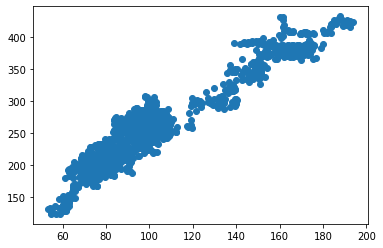

In [0]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [0]:
class Hypothesis:
  def __init__(self):
    self.b0 = 0
    self.b1 = 1
  def predict(self, x):
    return self.b0 + self.b1 * x
  def error(self, x, y):
    return sum( (self.predict(x) - y)**2 ) / (2 * len(x))
  def BGD(self, x, y):
    errors = []
    alpha = 0.0000005
    for i in range(1000):
      dJ0 = sum((self.predict(x) -y)) / len(x)
      dJ1 = sum((self.predict(x) -y) * x) / len(x)

      self.b0 -= alpha * dJ0
      self.b1 -= alpha * dJ1 

      errors.append(self.error(x, y))
    return errors

In [0]:
model = Hypothesis()
print(model.predict(0))
print(model.predict(10))
print(model.predict(np.arange(1, 10)))

0
10
[1 2 3 4 5 6 7 8 9]


13227.61296097838


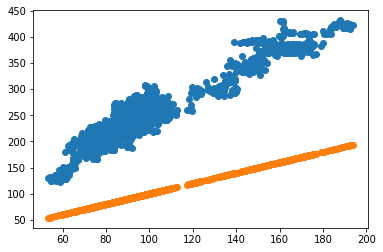

In [0]:
y_pred = model.predict(x)
print(model.error(x, y))
plt.figure()
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

298.85522767267844


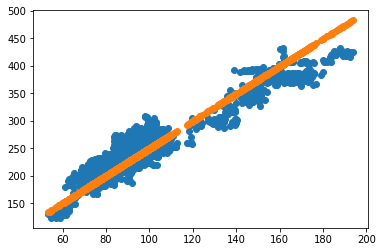

In [0]:
errors = model.BGD(x, y)
y_pred = model.predict(x)
model2 = Hypothesis()
print(model.error(x, y))
plt.figure()
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

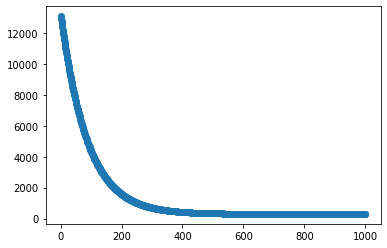

In [0]:
plt.figure
plt.scatter(np.linspace(1, 1000, len(errors)), errors)
plt.show()